In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

Some notes.

* `enumerate` and `zip` are both "iteration tools"; i.e., they transform an
  iterable object (something that can be used in a for-loop) in some way.
* `enumerate` takes an iterable object and lets you iterate over both that
  object and its indices; i.e., `enumerate(x)` iterates over both
  `range(len(x))` and `x` itself. When iterating, the index comes first. Passing
  a second argument to `enumerate` changes the starting index; e.g.,
  `enumerate(x, 1)` iterates over both `x` and `range(1, len(x) + 1)`.
* `zip` iterates over two (or more) sequences simultataneously. It is actually a
  strict generalization of `enumerate`, since you could write `enumerate(x)` as
  `zip(range(len(x)), x)`.
* `t[:-1]` includes all but the last element of `t`, while `t[1:]` includes all
  but the first element. That is,
  ```
  t[:-1] = t[0], t[1], t[2], ..., t[-2]
  t[1:]  = t[1], t[2], t[3], ..., t[-1]
  ```
  Iterating over these two sequences simultataneously, we obtain pairs of
  adjacent values.
* Functions passed to `odeint` need to be in the form `f(y, t) = ...`, so I also
  wrote `euler` and `heun` under that assumption.

In [2]:
def euler(f, y0, t):
    # Turn `y0` into an array if it's a scalar. Why? So that we always return
    # the same shape as `odeint`.
    y0 = np.atleast_1d(y0)
    ys = np.empty([len(t), *np.shape(y0)])
    ys[0] = y0
    y = y0
    for (i, (t0, t1)) in enumerate(zip(t[:-1], t[1:]), 1):
        dt = t1 - t0
        y += dt*f(y, t0)
        ys[i] = y
    return ys

In [11]:
def g(y, t):
    return y - t
y0 = 0.5
t = np.linspace(0.0, 1.0, 11)
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [12]:
euler_result = euler(g, y0, t)
euler_result

array([[0.5       ],
       [0.55      ],
       [0.595     ],
       [0.6345    ],
       [0.66795   ],
       [0.694745  ],
       [0.7142195 ],
       [0.72564145],
       [0.7282056 ],
       [0.72102615],
       [0.70312877]])

In [5]:
def heun(f, y0, t):
    y0 = np.atleast_1d(y0)
    ys = np.empty([len(t), *np.shape(y0)])
    ys[0] = y0
    y = y0
    for (i, (t0, t1)) in enumerate(zip(t[:-1], t[1:]), 1):
        dt = t1 - t0
        # Avoid computing this twice.
        f_y_t0 = f(y, t0)
        # Prediction.
        y_ = y + dt*f_y_t0
        # Correction.
        y = y + dt*(f_y_t0 + f(y_, t1))/2.0
        ys[i] = y
    return ys

In [13]:
heun_result = heun(g, y0, t)
heun_result

array([[0.5       ],
       [0.5475    ],
       [0.5894875 ],
       [0.62538369],
       [0.65454897],
       [0.67627662],
       [0.68978566],
       [0.69421316],
       [0.68860554],
       [0.67190912],
       [0.64295958]])

In [14]:
odeint_result = scipy.integrate.odeint(g, y0, t)
odeint_result

array([[0.5       ],
       [0.54741454],
       [0.58929863],
       [0.6250706 ],
       [0.65408765],
       [0.67563937],
       [0.6889406 ],
       [0.69312364],
       [0.68722949],
       [0.67019838],
       [0.64085904]])

In [8]:
def f(t):
    return t - np.exp(t)/2.0 + 1

In [20]:
exact_result = f(t)[:, np.newaxis]
exact_result

array([[0.5       ],
       [0.54741454],
       [0.58929862],
       [0.6250706 ],
       [0.65408765],
       [0.67563936],
       [0.6889406 ],
       [0.69312365],
       [0.68722954],
       [0.67019844],
       [0.64085909]])

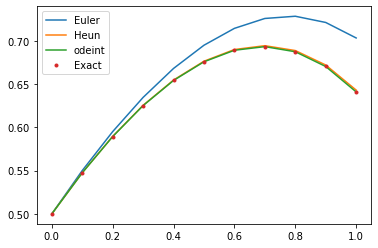

In [21]:
plt.plot(t, euler_result, label='Euler')
plt.plot(t, heun_result, label='Heun')
plt.plot(t, odeint_result, label='odeint')
plt.plot(t, exact_result, '.', label='Exact')
plt.legend()

In [22]:
euler_abs_error = np.abs(euler_result - exact_result)
euler_abs_error

array([[0.        ],
       [0.00258546],
       [0.00570138],
       [0.0094294 ],
       [0.01386235],
       [0.01910564],
       [0.0252789 ],
       [0.0325178 ],
       [0.04097606],
       [0.05082771],
       [0.06226968]])

In [24]:
heun_abs_error = np.abs(heun_result - exact_result)
heun_abs_error

array([[0.00000000e+00],
       [8.54590378e-05],
       [1.88879080e-04],
       [3.13091288e-04],
       [4.61323508e-04],
       [6.37252380e-04],
       [8.45062013e-04],
       [1.08951004e-03],
       [1.37600197e-03],
       [1.71067476e-03],
       [2.10049093e-03]])

In [25]:
odeint_abs_error = np.abs(odeint_result - exact_result)
odeint_abs_error

array([[0.00000000e+00],
       [3.41256123e-09],
       [7.87640231e-09],
       [3.90696586e-10],
       [2.13044893e-09],
       [2.60198063e-09],
       [1.30583511e-09],
       [6.04159012e-09],
       [4.39993412e-08],
       [6.05423948e-08],
       [4.46658150e-08]])

In [33]:
euler_rel_error = euler_abs_error / np.abs(exact_result)
euler_rel_error

array([[0.        ],
       [0.00472304],
       [0.00967486],
       [0.01508534],
       [0.02119341],
       [0.02827786],
       [0.03669242],
       [0.04691487],
       [0.059625  ],
       [0.07583979],
       [0.09716595]])

In [34]:
heun_rel_error = heun_abs_error / np.abs(exact_result)
heun_rel_error

array([[0.        ],
       [0.00015611],
       [0.00032052],
       [0.00050089],
       [0.00070529],
       [0.00094318],
       [0.00122661],
       [0.00157188],
       [0.00200225],
       [0.00255249],
       [0.00327762]])

In [35]:
odeint_rel_error = odeint_abs_error / np.abs(exact_result)
odeint_rel_error

array([[0.00000000e+00],
       [6.23396161e-09],
       [1.33657233e-08],
       [6.25043937e-10],
       [3.25713064e-09],
       [3.85113830e-09],
       [1.89542481e-09],
       [8.71646805e-09],
       [6.40242290e-08],
       [9.03350273e-08],
       [6.96967805e-08]])

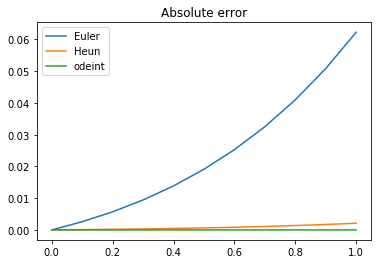

In [31]:
plt.title('Absolute error')
plt.plot(t, euler_abs_error, label='Euler')
plt.plot(t, heun_abs_error, label='Heun')
plt.plot(t, odeint_abs_error, label='odeint')
plt.legend()

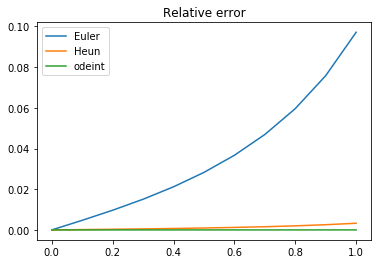

In [32]:
plt.title('Relative error')
plt.plot(t, euler_rel_error, label='Euler')
plt.plot(t, heun_rel_error, label='Heun')
plt.plot(t, odeint_rel_error, label='odeint')
plt.legend()